In [1]:
pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------------------------- ------------ 2.1/3.0 MB 11.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 12.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------------------- - 1.6/1.6 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.5 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=eb0d9d64fb07c93476d5

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and 
#keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.

btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period = '5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period = '5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period = '5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)

bnb = yf.Ticker('BNB-USD')
prices4 = usdt.history(period = '5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)


In [6]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names
# when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix= ' (BTC)', rsuffix= ' (ETH)')
p2 = prices3.join(prices4, lsuffix= ' (USDT)', rsuffix= ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')


In [7]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2021-01-03 00:00:00+00:00,32782.023438,78665235202,975.507690,45200463368,1.000514,120425679796,1.000514,120425679796
2021-01-04 00:00:00+00:00,31971.914062,81163475344,1040.233032,56945985763,1.000128,125906387011,1.000128,125906387011
2021-01-05 00:00:00+00:00,33992.429688,67547324782,1100.006104,41535932781,1.002202,101918715244,1.002202,101918715244
2021-01-06 00:00:00+00:00,36824.363281,75289433811,1207.112183,44699914188,1.001528,116105139289,1.001528,116105139289
2021-01-07 00:00:00+00:00,39371.042969,84762141031,1225.678101,40468027280,1.000400,129467601516,1.000400,129467601516


In [8]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-12-30 00:00:00+00:00,88430.132812,35586356225,2971.416748,18816704381,0.998867,74119035312,0.998867,74119035312
2025-12-31 00:00:00+00:00,87508.828125,33830210616,2967.037598,16451891101,0.998449,70259461189,0.998449,70259461189
2026-01-01 00:00:00+00:00,88731.984375,18849043990,3000.394287,10268796662,0.998745,50548666268,0.998745,50548666268
2026-01-02 00:00:00+00:00,89944.695312,46398906171,3124.422607,25242778003,0.999672,96128566387,0.999672,96128566387
2026-01-03 00:00:00+00:00,89937.351562,32823195648,3101.264648,17426731008,0.999360,76398641152,0.999360,76398641152


In [9]:
data.shape

(1827, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2021-01-03 00:00:00+00:00 to 2026-01-03 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [11]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [12]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,54509.928428,3.714949e+10,2537.631462,1.953863e+10,1.000146,7.093200e+10,1.000146,7.093200e+10
std,29479.546445,2.303833e+10,909.650281,1.294662e+10,0.000710,4.503608e+10,0.000710,4.503608e+10
min,15787.284180,5.331173e+09,975.507690,2.081626e+09,0.995872,9.989859e+09,0.995872,9.989859e+09
25%,29412.204102,2.132182e+10,1792.933411,1.025234e+10,0.999894,4.011224e+10,0.999894,4.011224e+10
50%,46481.105469,3.180847e+10,2455.935059,1.645097e+10,1.000142,6.045086e+10,1.000142,6.045086e+10
75%,69297.523438,4.714782e+10,3234.704468,2.505416e+10,1.000385,8.811112e+10,1.000385,8.811112e+10
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1.011530,3.443980e+11


# Exploratory Data Analysis

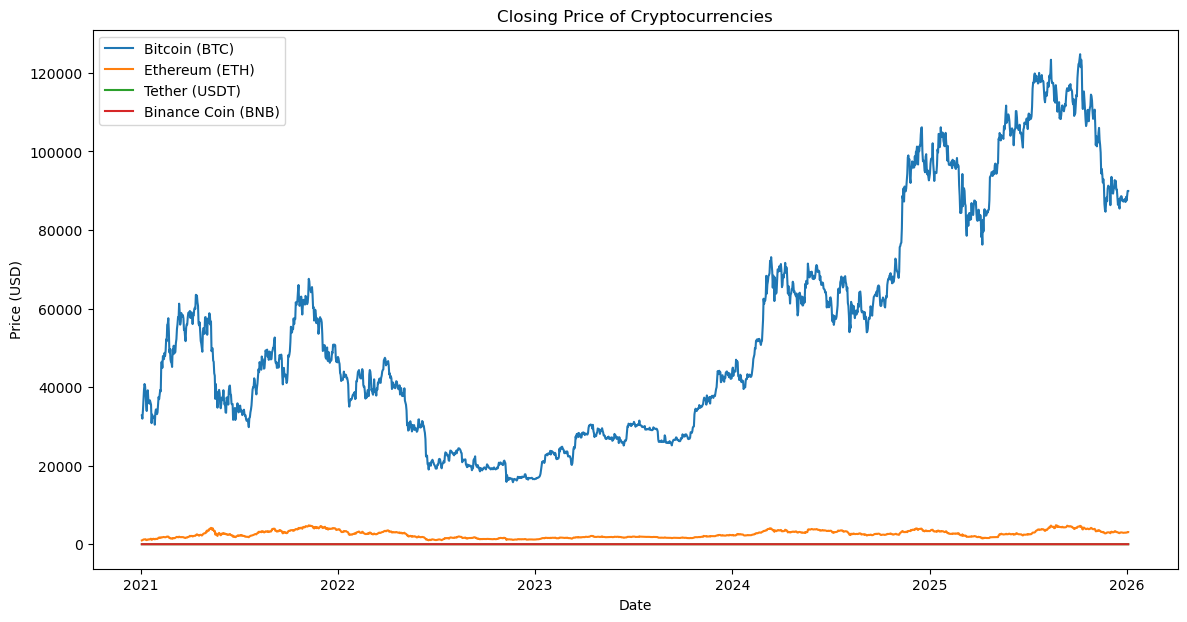

In [13]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label = 'Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label = 'Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label = 'Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label = 'Binance Coin (BNB)')
plt.title('Closing Price of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

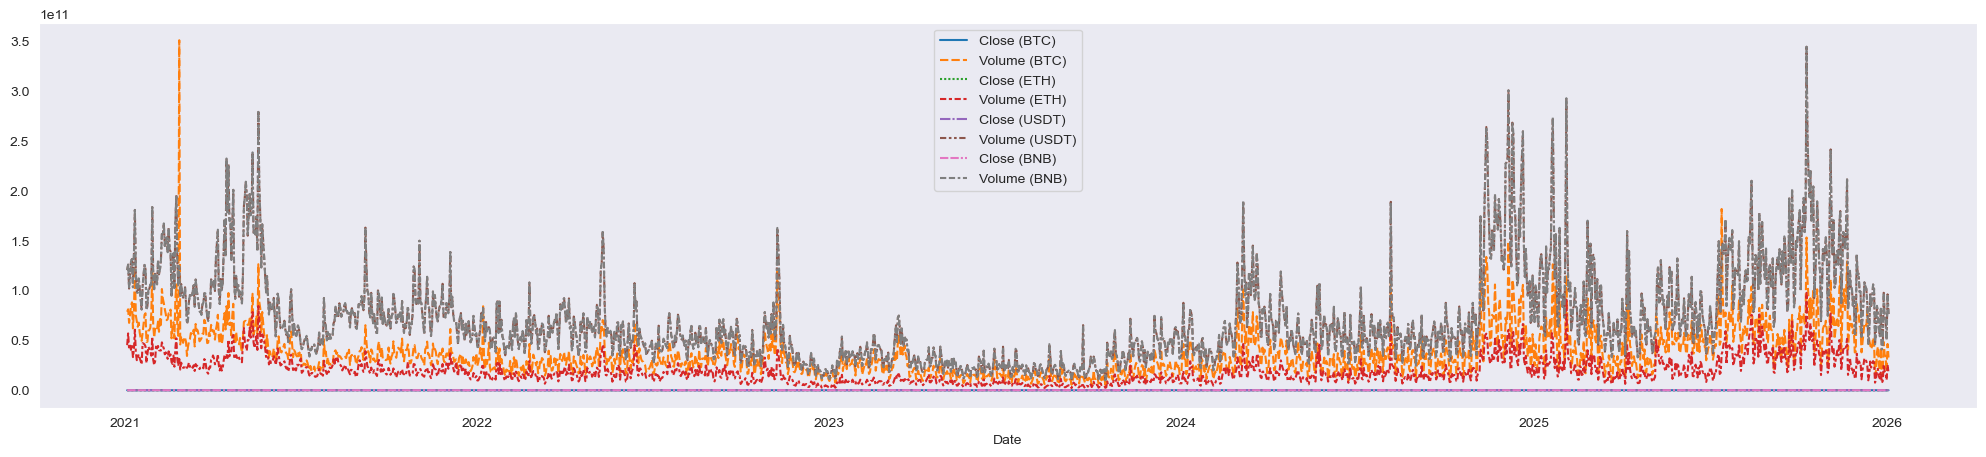

In [17]:
plt.figure(figsize=(25, 5))
sns.set_style('dark')
sns.lineplot(data = data)

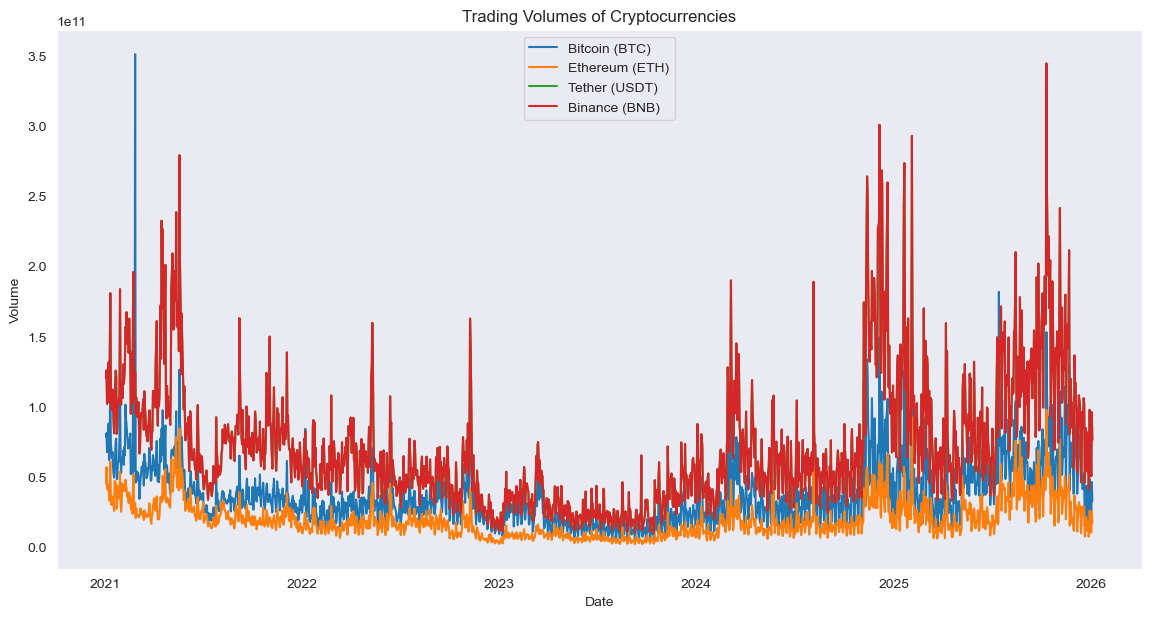

In [19]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label = 'Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label = 'Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label = 'Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label = 'Binance (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


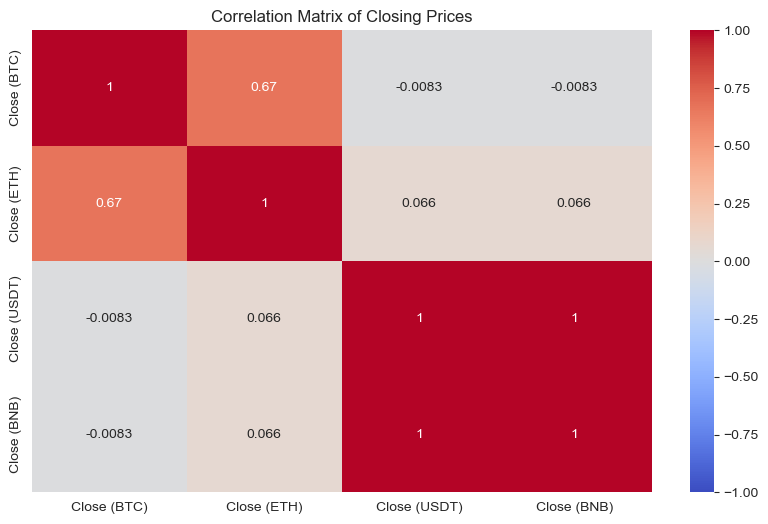

In [22]:
#Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix

corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

#Plot the Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

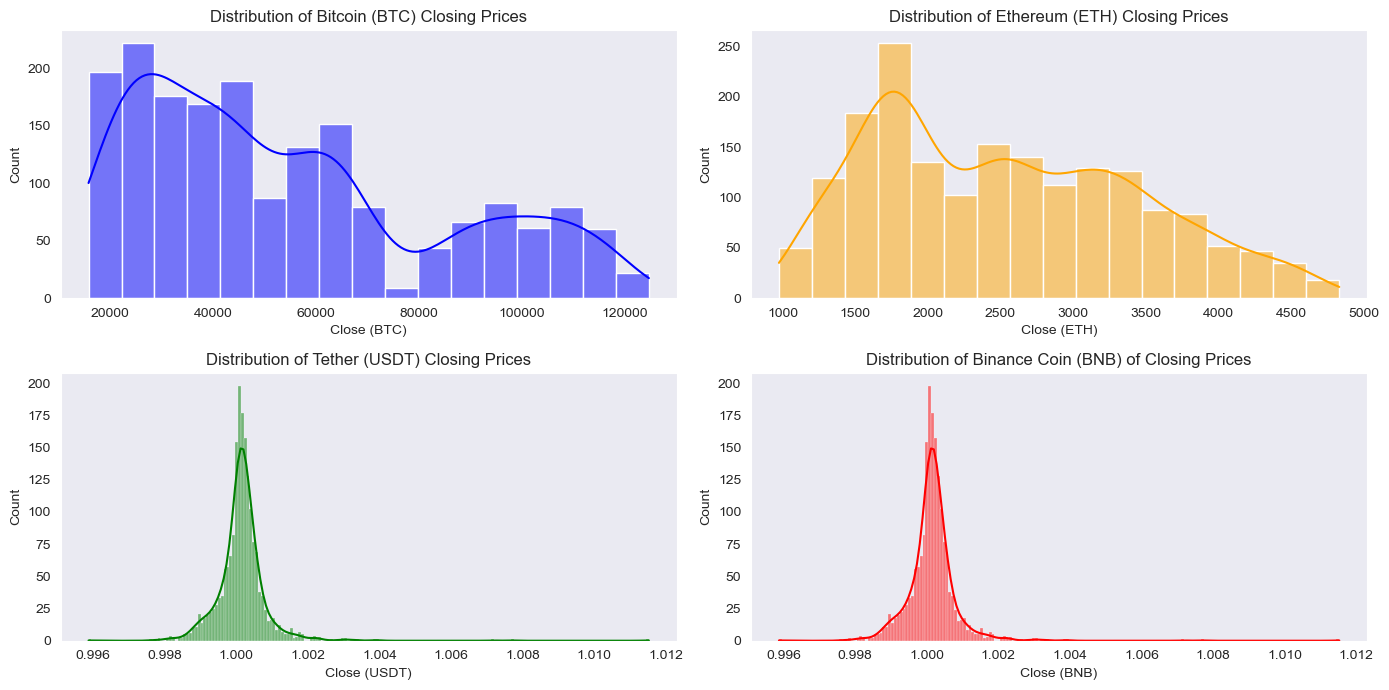

In [25]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2,2,1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title("Distribution of Bitcoin (BTC) Closing Prices")

plt.subplot(2,2,2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title("Distribution of Ethereum (ETH) Closing Prices")

plt.subplot(2,2,3)
sns.histplot(data['Close (USDT)'], kde = True, color='green')
plt.title("Distribution of Tether (USDT) Closing Prices")

plt.subplot(2,2,4)
sns.histplot(data['Close (BNB)'], kde=True, color= 'red')
plt.title('Distribution of Binance Coin (BNB) of Closing Prices')

plt.tight_layout()
plt.show()



array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

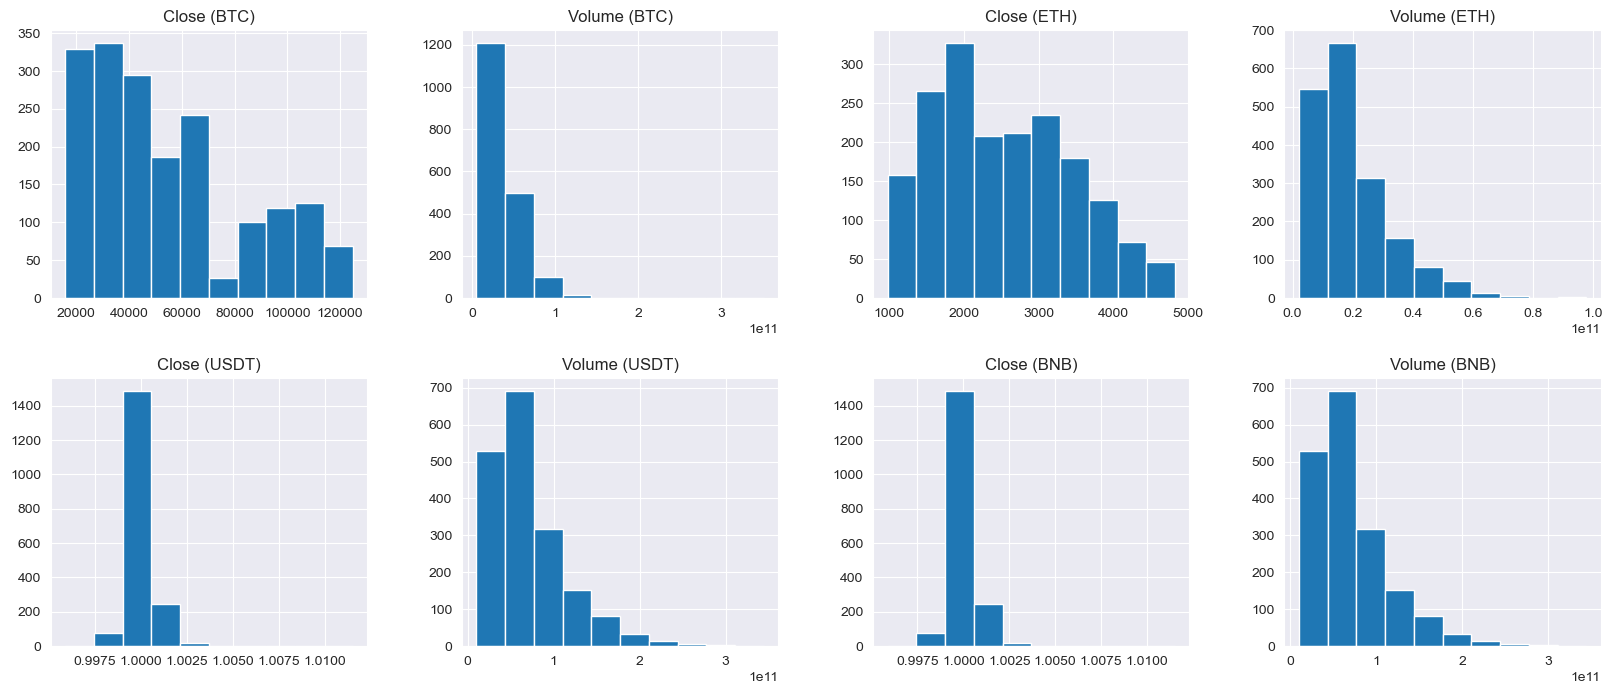

In [26]:
data.hist(figsize=(20,8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

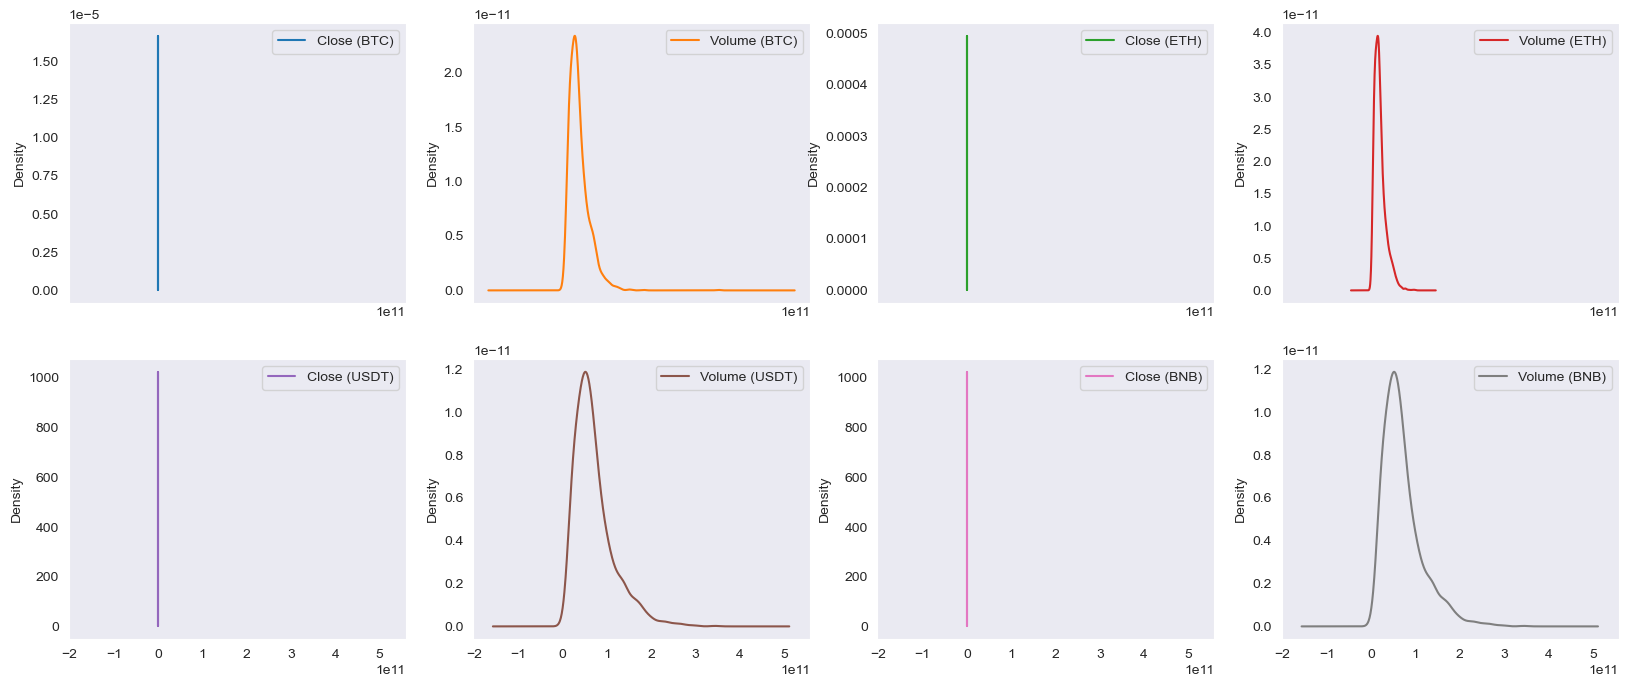

In [27]:
data.plot(kind='kde', subplots=True, layout=(2,4), figsize=(20,8))

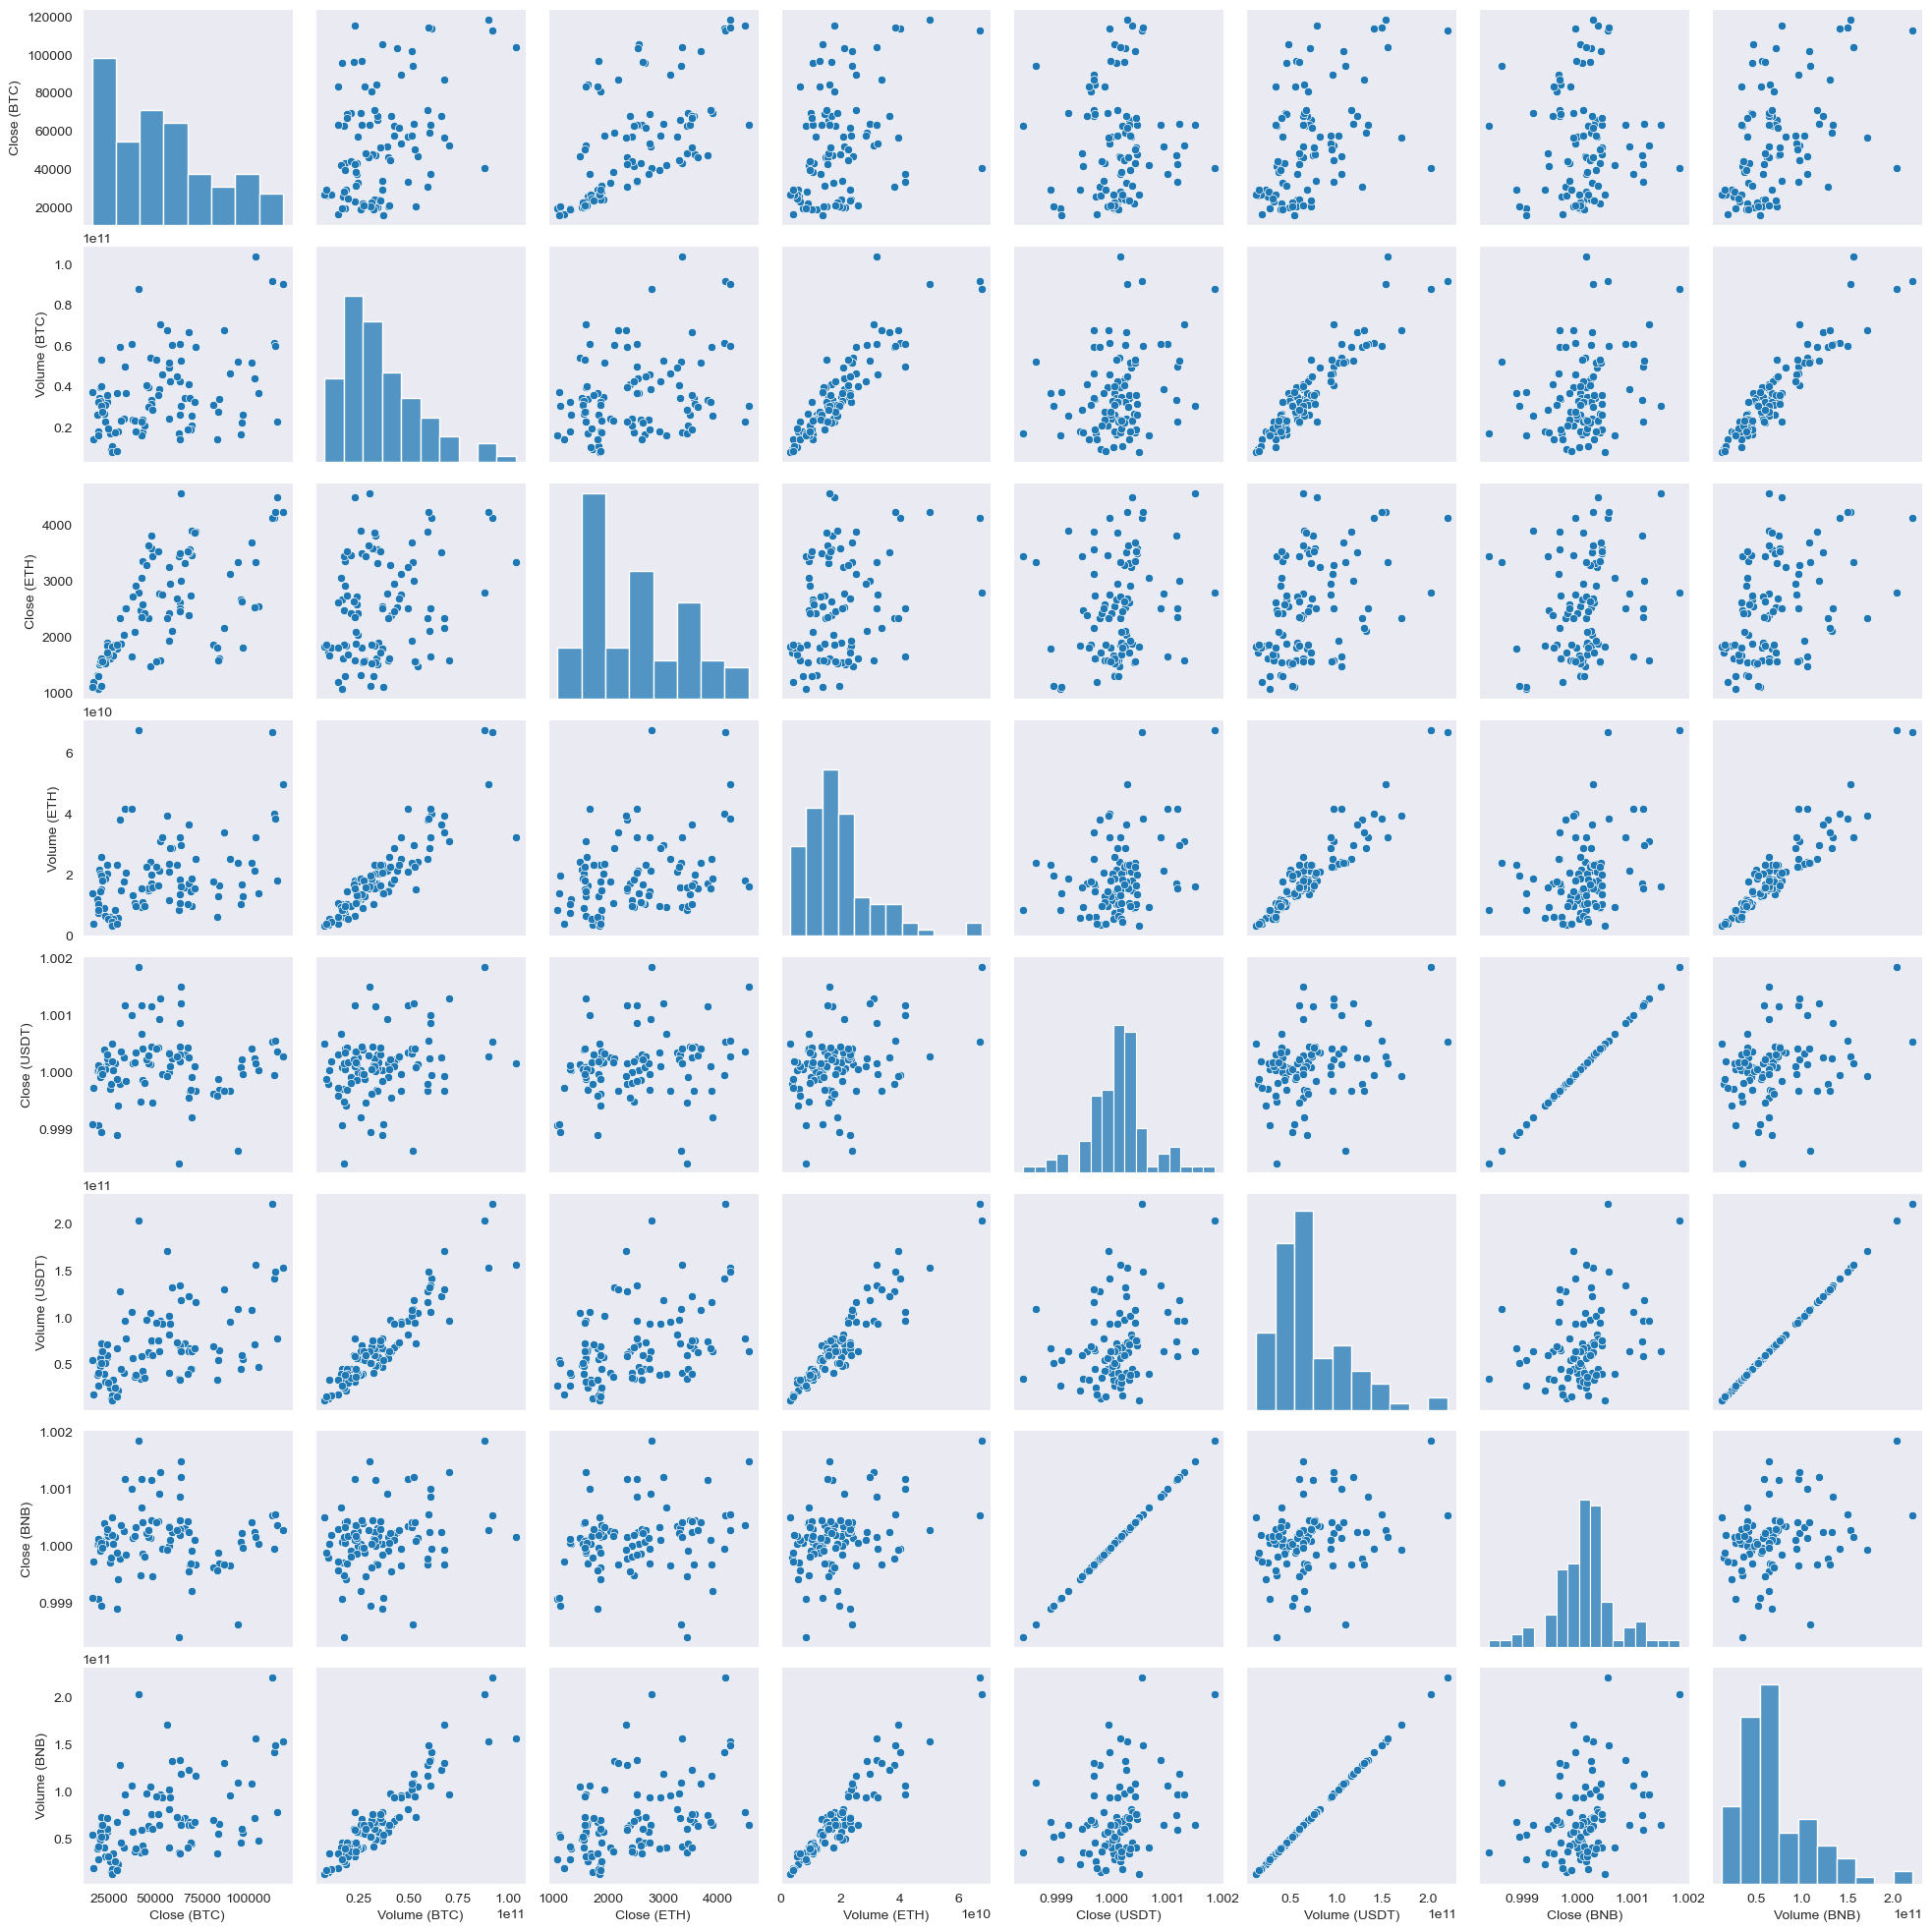

In [31]:
sns.pairplot(data.sample(n=100))

## Data Pre - processing

In [32]:
X = data.drop(columns=['Close (BTC)'], axis=1)
y = data.loc[:, 'Close (BTC)']

In [33]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2021-01-03 00:00:00+00:00,78665235202,975.507690,45200463368,1.000514,120425679796,1.000514,120425679796
2021-01-04 00:00:00+00:00,81163475344,1040.233032,56945985763,1.000128,125906387011,1.000128,125906387011
2021-01-05 00:00:00+00:00,67547324782,1100.006104,41535932781,1.002202,101918715244,1.002202,101918715244
2021-01-06 00:00:00+00:00,75289433811,1207.112183,44699914188,1.001528,116105139289,1.001528,116105139289
2021-01-07 00:00:00+00:00,84762141031,1225.678101,40468027280,1.000400,129467601516,1.000400,129467601516


In [34]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-12-30 00:00:00+00:00,35586356225,2971.416748,18816704381,0.998867,74119035312,0.998867,74119035312
2025-12-31 00:00:00+00:00,33830210616,2967.037598,16451891101,0.998449,70259461189,0.998449,70259461189
2026-01-01 00:00:00+00:00,18849043990,3000.394287,10268796662,0.998745,50548666268,0.998745,50548666268
2026-01-02 00:00:00+00:00,46398906171,3124.422607,25242778003,0.999672,96128566387,0.999672,96128566387
2026-01-03 00:00:00+00:00,32823195648,3101.264648,17426731008,0.999360,76398641152,0.999360,76398641152


In [35]:
y.head()

Date
2021-01-03 00:00:00+00:00    32782.023438
2021-01-04 00:00:00+00:00    31971.914062
2021-01-05 00:00:00+00:00    33992.429688
2021-01-06 00:00:00+00:00    36824.363281
2021-01-07 00:00:00+00:00    39371.042969
Name: Close (BTC), dtype: float64

In [36]:
y.tail()

Date
2025-12-30 00:00:00+00:00    88430.132812
2025-12-31 00:00:00+00:00    87508.828125
2026-01-01 00:00:00+00:00    88731.984375
2026-01-02 00:00:00+00:00    89944.695312
2026-01-03 00:00:00+00:00    89937.351562
Name: Close (BTC), dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [38]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [39]:
#SelectKBest is a feature selection method provided by scikit-learn that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, y_train)
X_test = fs.transform(X_test)

c:\Users\akash\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [40]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features :", selected_features)

Selected Features : Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [41]:
X_train

array([[1.00015497e+00, 6.59355365e+10, 1.00015497e+00, 6.59355365e+10],
       [1.00047398e+00, 7.95623781e+10, 1.00047398e+00, 7.95623781e+10],
       [1.00028098e+00, 5.35244431e+10, 1.00028098e+00, 5.35244431e+10],
       ...,
       [1.00002396e+00, 1.39888129e+11, 1.00002396e+00, 1.39888129e+11],
       [9.99773979e-01, 4.41267496e+10, 9.99773979e-01, 4.41267496e+10],
       [9.99162972e-01, 3.48790989e+10, 9.99162972e-01, 3.48790989e+10]])

In [42]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:
#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Define Models and Perform Training and Evaluation

models = {
    ''
}